In [1]:
#Import libraries 
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_consum = pd.read_csv("C:/Maryam/ODU/Fall2021/DataVisualisation/HWs/HW6/Data/U.S._Product_Supplied_of_Finished_Motor_Gasoline.csv",error_bad_lines=False)
df_price = pd.read_csv("C:/Maryam/ODU/Fall2021/DataVisualisation/HWs/HW6/Data/U.S._Regular_All_Formulations_Retail_Gasoline_Prices.csv",error_bad_lines=False)

C:\Users\Maryam\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
print(df_consum.shape)
df_consum.head()

(920, 2)


,Month,U.S. Product Supplied of Finished Motor Gasoline Thousand Barrels per Day
0,Aug-21,9111
1,Jul-21,9313
2,Jun-21,9273
3,May-21,9137
4,Apr-21,8791


In [4]:
print(df_price.shape)
df_price.head()

(374, 2)


,Month,U.S. Regular All Formulations Retail Gasoline Prices Dollars per Gallon
0,21-Oct,3.291
1,21-Sep,3.175
2,21-Aug,3.158
3,21-Jul,3.136
4,21-Jun,3.064


In [5]:
df_price.drop([0,1],inplace=True)

In [6]:
df_price.head()

,Month,U.S. Regular All Formulations Retail Gasoline Prices Dollars per Gallon
2,21-Aug,3.158
3,21-Jul,3.136
4,21-Jun,3.064
5,21-May,2.985
6,21-Apr,2.858


In [7]:
df_consum.drop(df_consum.index[372:920], inplace=True)

In [8]:
print(len(df_price))
print(len(df_consum))

372
372


In [9]:
#df_price.reset_index(drop=True, inplace=True)

In [10]:
#df_consum.reset_index(drop=True, inplace=True)

In [11]:
frames =[df_consum, df_price]
df_consum.index = df_price.index
data = pd.concat(frames, axis=1)
data.head()

,Month,U.S. Product Supplied of Finished Motor Gasoline Thousand Barrels per Day,Month,U.S. Regular All Formulations Retail Gasoline Prices Dollars per Gallon
2,Aug-21,9111,21-Aug,3.158
3,Jul-21,9313,21-Jul,3.136
4,Jun-21,9273,21-Jun,3.064
5,May-21,9137,21-May,2.985
6,Apr-21,8791,21-Apr,2.858


In [12]:
main_data = data.loc[:,~data.columns.duplicated()]

In [13]:
main_data.head()

,Month,U.S. Product Supplied of Finished Motor Gasoline Thousand Barrels per Day,U.S. Regular All Formulations Retail Gasoline Prices Dollars per Gallon
2,Aug-21,9111,3.158
3,Jul-21,9313,3.136
4,Jun-21,9273,3.064
5,May-21,9137,2.985
6,Apr-21,8791,2.858


In [14]:
main_data.rename(columns={"U.S. Product Supplied of Finished Motor Gasoline Thousand Barrels per Day": "Consumption", "U.S. Regular All Formulations Retail Gasoline Prices Dollars per Gallon": "Price"}, inplace=True)

C:\Users\Maryam\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [15]:
main_data.describe()

,Consumption,Price
count,372.000000,370.000000
mean,8592.819892,2.085281
std,729.826492,0.880164
min,5866.000000,0.921000
25%,8120.750000,1.202500
50%,8797.500000,2.095000
75%,9148.000000,2.768250
max,9834.000000,4.062000


In [16]:
main_data.shape

(372, 3)

In [17]:
main_data.isnull().sum()

Month          0
Consumption    0
Price          2
dtype: int64

In [18]:
main_data.dropna(inplace=True)

C:\Users\Maryam\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [19]:
main_data.shape

(370, 3)

Text(0, 0.5, 'Value ($/Gallon)')

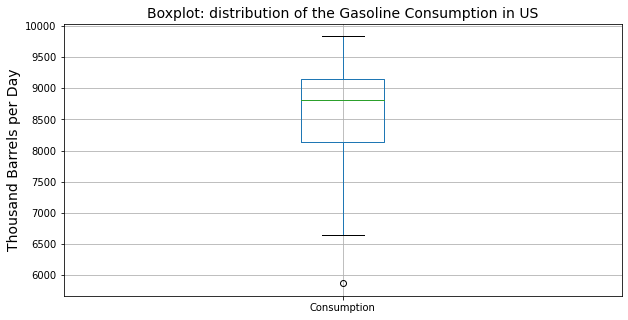

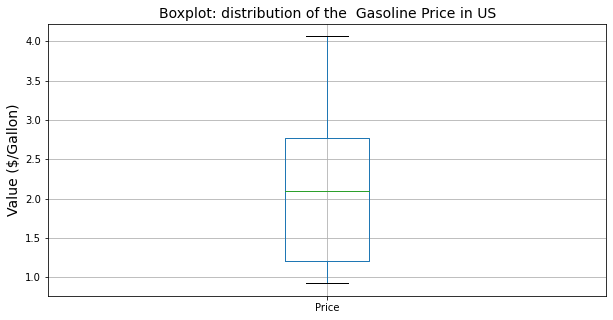

In [20]:
# make boxplot
plt.figure(figsize=(10, 5))
boxplot_cons= main_data.boxplot(column=['Consumption'])
plt.title('Boxplot: distribution of the Gasoline Consumption in US',fontsize=14, color='black')
plt.ylabel('Thousand Barrels per Day', fontsize=14, color='black')

plt.figure(figsize=(10, 5))
boxplot_price = main_data.boxplot(column=['Price'])
plt.title('Boxplot: distribution of the  Gasoline Price in US',fontsize=14, color='black')
plt.ylabel('Value ($/Gallon)', fontsize=14, color='black')

Text(0, 0.5, 'Frequency')

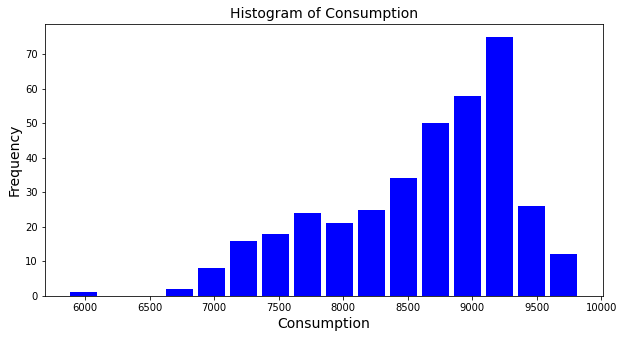

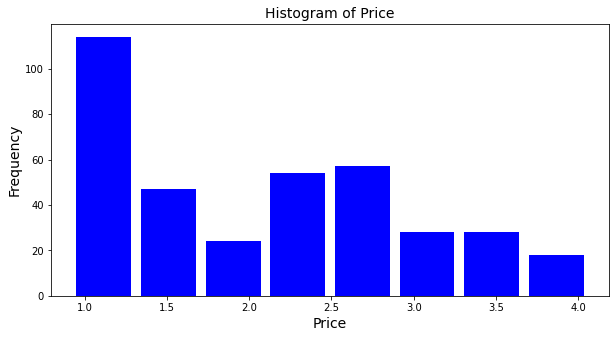

In [21]:
# Creating Histogram
plt.figure(figsize=(10, 5))
plt.hist(x = main_data['Consumption'], bins=16, color='blue', rwidth=0.85)
plt.title('Histogram of Consumption',fontsize=14, color='black')
plt.xlabel('Consumption', fontsize=14, color='black')
plt.ylabel('Frequency', fontsize=14, color='black')



plt.figure(figsize=(10, 5))
#bins_list = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]
plt.hist(x = main_data['Price'], bins=8, color='blue', rwidth=0.85)
plt.title('Histogram of Price',fontsize=14, color='black')
plt.xlabel('Price', fontsize=14, color='black')
plt.ylabel('Frequency', fontsize=14, color='black')

Text(0.5, 1.0, 'eCDF for Consumption using seaborn library ')

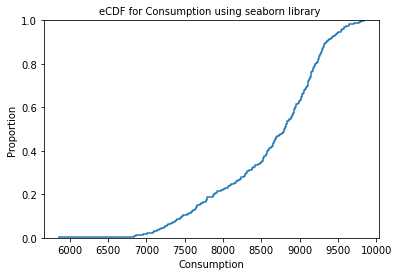

In [22]:
#Import seaborn library and generate ecdf plot
import seaborn as sns
sns.ecdfplot(x = main_data['Consumption'])
plt.title('eCDF for Consumption using seaborn library ',fontsize=10, color='black')

Text(0.5, 1.0, 'eCDF for Price using seaborn library ')

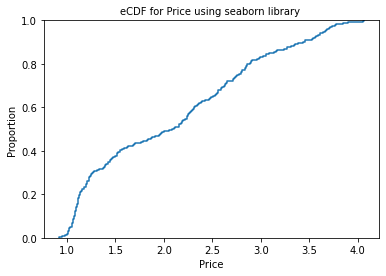

In [23]:
sns.ecdfplot(x = main_data['Price'])
plt.title('eCDF for Price using seaborn library ',fontsize=10, color='black')

In [24]:
main_data.head()

,Month,Consumption,Price
2,Aug-21,9111,3.158
3,Jul-21,9313,3.136
4,Jun-21,9273,3.064
5,May-21,9137,2.985
6,Apr-21,8791,2.858


In [25]:
import datetime
main_data['Month-Year']=[datetime.datetime.strptime(x,'%b-%y').strftime('%m-%Y') for x in main_data['Month']]


C:\Users\Maryam\AppData\Local\Temp/ipykernel_21372/3304071028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data['Month-Year']=[datetime.datetime.strptime(x,'%b-%y').strftime('%m-%Y') for x in main_data['Month']]


In [26]:
main_data['Year']=''
for i in range(len( main_data)):
    main_data['Year'].values[i]= pd.to_numeric(main_data['Month-Year'].values[i][3:7])

C:\Users\Maryam\AppData\Local\Temp/ipykernel_21372/3338716879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data['Year']=''


In [27]:
main_data.head(30)

,Month,Consumption,Price,Month-Year,Year
2,Aug-21,9111,3.158,08-2021,2021
3,Jul-21,9313,3.136,07-2021,2021
4,Jun-21,9273,3.064,06-2021,2021
5,May-21,9137,2.985,05-2021,2021
6,Apr-21,8791,2.858,04-2021,2021
7,Mar-21,8577,2.810,03-2021,2021
8,Feb-21,7744,2.501,02-2021,2021
9,Jan-21,7666,2.334,01-2021,2021
10,Dec-20,7855,2.195,12-2020,2020
11,Nov-20,8001,2.108,11-2020,2020


In [28]:
final_data = main_data.groupby(['Year']).mean()
final_data.head()

,Consumption,Price
Year,,
1990,7127.000000,1.305667
1991,7233.636364,1.095182
1992,7266.166667,1.085750
1993,7474.333333,1.067083
1994,7599.166667,1.074417


In [29]:
final_data.shape

(32, 2)

In [30]:
df_final = final_data.reset_index()

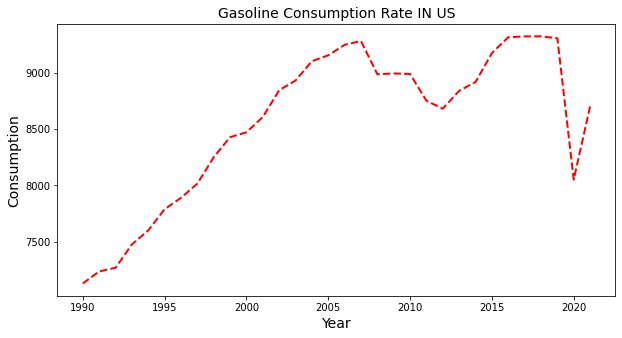

In [31]:
plt.figure(figsize=(10, 5))
plt.plot('Year', 'Consumption', data= df_final, linewidth=2,linestyle='--', color = 'red')
plt.title('Gasoline Consumption Rate IN US',fontsize=14, color='black')
plt.xlabel('Year', fontsize=14, color='black')
plt.ylabel('Consumption', fontsize=14, color='black')
plt.show()

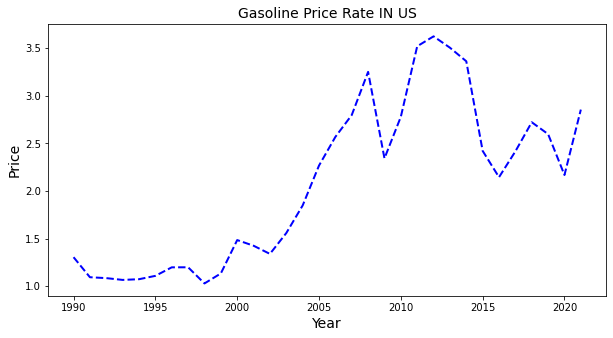

In [32]:
plt.figure(figsize=(10, 5))
plt.plot('Year', 'Price', data= df_final, linewidth=2, linestyle='--', color = 'blue')
plt.title('Gasoline Price Rate IN US',fontsize=14, color='black')
plt.xlabel('Year', fontsize=14, color='black')
plt.ylabel('Price', fontsize=14, color='black')
plt.show()

In [33]:
# Highest Consumption Date
high_consumption = main_data[main_data['Consumption']>9700] 
high_consumption

,Month,Consumption,Price,Month-Year,Year
26,Aug-19,9834,2.621,08-2019,2019
28,Jun-19,9703,2.716,06-2019,2019
38,Aug-18,9778,2.836,08-2018,2018
40,Jun-18,9797,2.891,06-2018,2018
50,Aug-17,9752,2.380,08-2017,2017
52,Jun-17,9772,2.347,06-2017,2017


In [34]:
# Highest Price Date
high_price = main_data[main_data['Price']>3.85] 
high_price

,Month,Consumption,Price,Month-Year,Year
114,Apr-12,8741,3.900,04-2012,2012
115,Mar-12,8582,3.852,03-2012,2012
125,May-11,8817,3.906,05-2011,2011
159,Jul-08,9150,4.062,07-2008,2008
160,Jun-08,9110,4.054,06-2008,2008


In [35]:
main_data.head()

,Month,Consumption,Price,Month-Year,Year
2,Aug-21,9111,3.158,08-2021,2021
3,Jul-21,9313,3.136,07-2021,2021
4,Jun-21,9273,3.064,06-2021,2021
5,May-21,9137,2.985,05-2021,2021
6,Apr-21,8791,2.858,04-2021,2021


In [36]:
main_data[main_data['Consumption']>4] 

,Month,Consumption,Price,Month-Year,Year
2,Aug-21,9111,3.158,08-2021,2021
3,Jul-21,9313,3.136,07-2021,2021
4,Jun-21,9273,3.064,06-2021,2021
5,May-21,9137,2.985,05-2021,2021
6,Apr-21,8791,2.858,04-2021,2021
...,...,...,...,...,...
367,Mar-91,7017,1.040,03-1991,1991
368,Feb-91,6838,1.094,02-1991,1991
371,Nov-90,7241,1.324,11-1990,1990
372,Oct-90,7226,1.335,10-1990,1990


In [37]:
#main_data.loc[main_data['Month'].str.contains('21', case=False)] = 21

In [38]:
main_data.head()

,Month,Consumption,Price,Month-Year,Year
2,Aug-21,9111,3.158,08-2021,2021
3,Jul-21,9313,3.136,07-2021,2021
4,Jun-21,9273,3.064,06-2021,2021
5,May-21,9137,2.985,05-2021,2021
6,Apr-21,8791,2.858,04-2021,2021


In [39]:
data_gas_2020 = main_data[main_data['Year']==2020]

In [40]:
data_gas_2020

,Month,Consumption,Price,Month-Year,Year
10,Dec-20,7855,2.195,12-2020,2020
11,Nov-20,8001,2.108,11-2020,2020
12,Oct-20,8316,2.158,10-2020,2020
13,Sep-20,8541,2.183,09-2020,2020
14,Aug-20,8524,2.182,08-2020,2020
15,Jul-20,8460,2.183,07-2020,2020
16,Jun-20,8292,2.082,06-2020,2020
17,May-20,7198,1.870,05-2020,2020
18,Apr-20,5866,1.841,04-2020,2020
19,Mar-20,7779,2.234,03-2020,2020


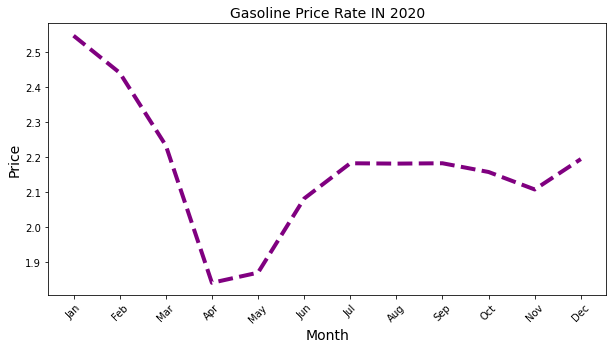

In [41]:
plt.figure(figsize=(10, 5))
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep', 'Oct', 'Nov', 'Dec']
plt.plot(month, data_gas_2020['Price'][::-1], linewidth=4, linestyle='--', color = 'purple')
plt.title('Gasoline Price Rate IN 2020',fontsize=14, color='black')
plt.xlabel('Month', fontsize=14, color='black')
plt.ylabel('Price', fontsize=14, color='black')
plt.xticks(rotation = 45)
plt.show()

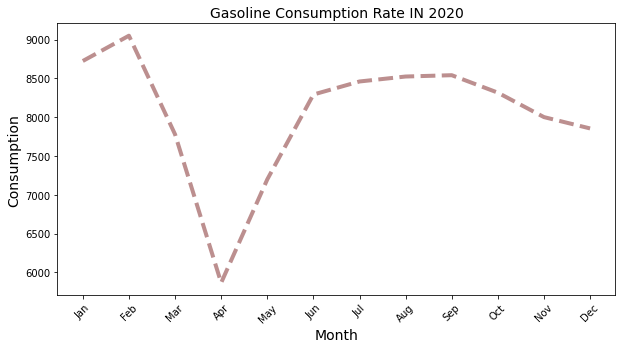

In [42]:
plt.figure(figsize=(10, 5))
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep', 'Oct', 'Nov', 'Dec']
plt.plot(month, data_gas_2020['Consumption'][::-1], linewidth=4, linestyle='--', color = 'rosybrown')
plt.title('Gasoline Consumption Rate IN 2020',fontsize=14, color='black')
plt.xlabel('Month', fontsize=14, color='black')
plt.ylabel('Consumption', fontsize=14, color='black')
plt.xticks(rotation = 45)
plt.show()

In [43]:
data_gas_2018 = main_data[main_data['Year']==2018]
data_gas_2019 = main_data[main_data['Year']==2019]
data_gas_2021 = main_data[main_data['Year']==2021]

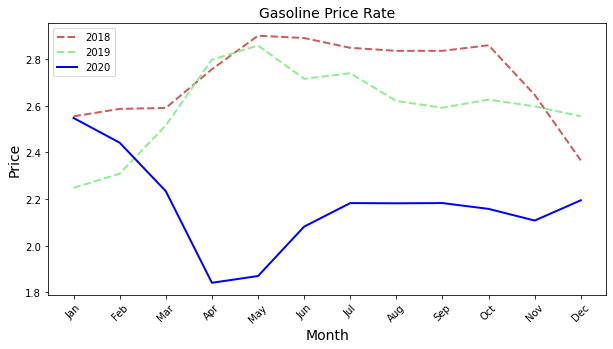

In [44]:
# Create gas price chart for years before 2020
plt.figure(figsize=(10, 5))
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep', 'Oct', 'Nov', 'Dec']
plt.plot(month, data_gas_2018['Price'][::-1], linewidth=2, linestyle='--', color = 'indianred', label='2018')
plt.plot(month, data_gas_2019['Price'][::-1], linewidth=2, linestyle='--', color = 'lightgreen', label='2019')
plt.plot(month, data_gas_2020['Price'][::-1], linewidth=2, linestyle='-', color = 'blue', label='2020')
plt.title('Gasoline Price Rate',fontsize=14, color='black')
plt.xlabel('Month', fontsize=14, color='black')
plt.ylabel('Price', fontsize=14, color='black')
plt.xticks(rotation = 45)
plt.legend(loc="upper left")
plt.show()

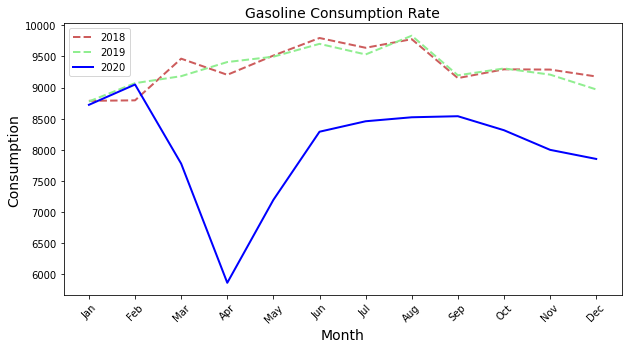

In [45]:
# Create gas consumption chart for years before 2020
plt.figure(figsize=(10, 5))
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep', 'Oct', 'Nov', 'Dec']
plt.plot(month, data_gas_2018['Consumption'][::-1], linewidth=2, linestyle='--', color = 'indianred', label='2018')
plt.plot(month, data_gas_2019['Consumption'][::-1], linewidth=2, linestyle='--', color = 'lightgreen', label='2019')
plt.plot(month, data_gas_2020['Consumption'][::-1], linewidth=2, linestyle='-', color = 'blue', label='2020')
plt.title('Gasoline Consumption Rate',fontsize=14, color='black')
plt.xlabel('Month', fontsize=14, color='black')
plt.ylabel('Consumption', fontsize=14, color='black')
plt.xticks(rotation = 45)
plt.legend(loc="upper left")
plt.show()

In [46]:
# Covid Dataset
df_covid = pd.read_csv('C:/Maryam/ODU/Fall2021/DataVisualisation/HWs/HW7/us.csv')
df_covid.head()

,date,geoid,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,1/21/2020,USA,1,0.14,0.0,0,0.0,0.0
1,1/22/2020,USA,0,0.14,0.0,0,0.0,0.0
2,1/23/2020,USA,0,0.14,0.0,0,0.0,0.0
3,1/24/2020,USA,1,0.29,0.0,0,0.0,0.0
4,1/25/2020,USA,1,0.43,0.0,0,0.0,0.0


In [47]:
df_covid.isnull().sum()

date                   0
geoid                  0
cases                  0
cases_avg              0
cases_avg_per_100k     0
deaths                 0
deaths_avg             0
deaths_avg_per_100k    0
dtype: int64

In [48]:
df_covid.shape

(679, 8)

In [49]:
df_covid.describe()

,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
count,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000
mean,71298.223859,70414.986701,21.221429,1147.706922,1120.393814,0.337614
std,65529.562321,59597.455820,17.961358,986.124640,809.179478,0.243871
min,-23999.000000,0.140000,0.000000,0.000000,0.000000,0.000000
25%,25413.500000,26119.655000,7.870000,409.000000,597.120000,0.180000
50%,50468.000000,54594.060000,16.450000,917.000000,931.050000,0.280000
75%,94528.500000,94425.140000,28.455000,1611.500000,1570.620000,0.475000
max,301138.000000,251231.860000,75.720000,5463.000000,3342.210000,1.010000


In [50]:
df_main_covid = df_covid.drop(['cases_avg','geoid','cases_avg_per_100k','deaths_avg','deaths_avg_per_100k'], axis =1)
df_main_covid.head()

,date,cases,deaths
0,1/21/2020,1,0
1,1/22/2020,0,0
2,1/23/2020,0,0
3,1/24/2020,1,0
4,1/25/2020,1,0


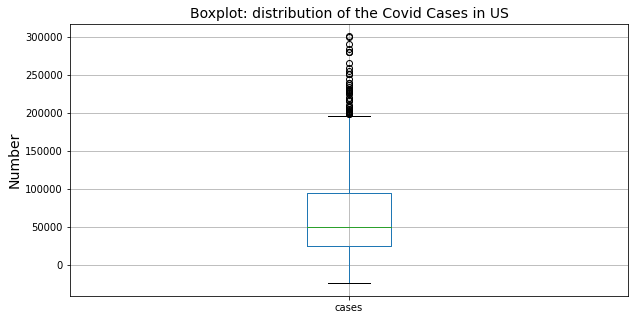

In [51]:
# create boxplot
plt.figure(figsize=(10, 5))
boxplot_cases = df_main_covid.boxplot(column=['cases'])
plt.title('Boxplot: distribution of the Covid Cases in US',fontsize=14, color='black')
plt.ylabel('Number', fontsize=14, color='black')
plt.ticklabel_format(style='plain',axis='y') 
plt.show()

Text(0, 0.5, 'Number')

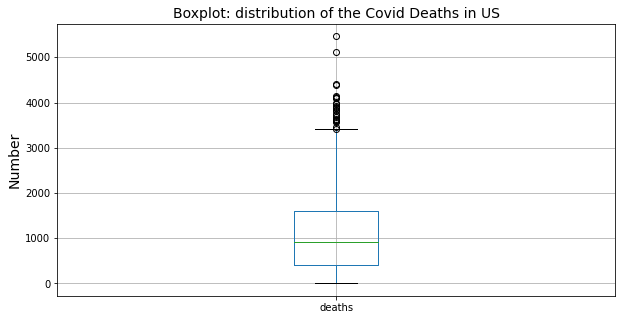

In [52]:
plt.figure(figsize=(10, 5))
boxplot_deaths = df_main_covid.boxplot(column=['deaths'])
plt.title('Boxplot: distribution of the Covid Deaths in US',fontsize=14, color='black')
plt.ylabel('Number', fontsize=14, color='black')


Text(0, 0.5, 'Frequency')

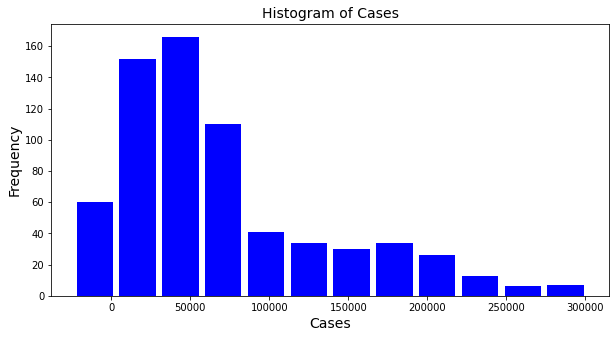

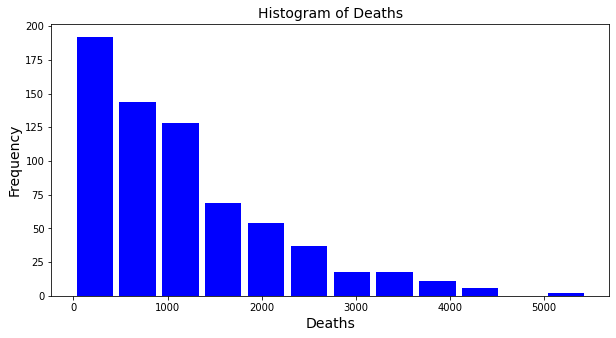

In [53]:
# Creating Histogram
plt.figure(figsize=(10, 5))
plt.hist(x = df_main_covid['cases'], bins=12, color='blue', rwidth=0.85)
plt.title('Histogram of Cases',fontsize=14, color='black')
plt.xlabel('Cases', fontsize=14, color='black')
plt.ylabel('Frequency', fontsize=14, color='black')
plt.ticklabel_format(style='plain',axis='x') 



plt.figure(figsize=(10, 5))
plt.hist(x = df_main_covid['deaths'], bins=12, color='blue', rwidth=0.85)
plt.title('Histogram of Deaths',fontsize=14, color='black')
plt.xlabel('Deaths', fontsize=14, color='black')
plt.ylabel('Frequency', fontsize=14, color='black')

Text(0, 0.5, 'Frequency')

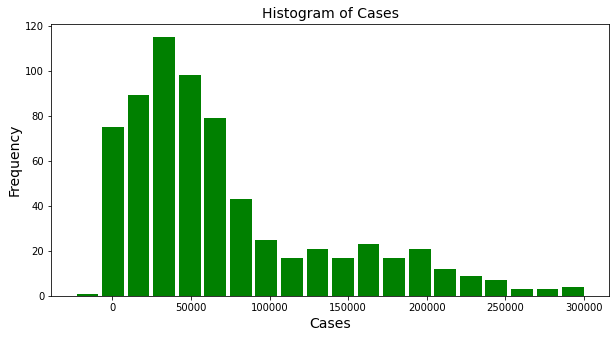

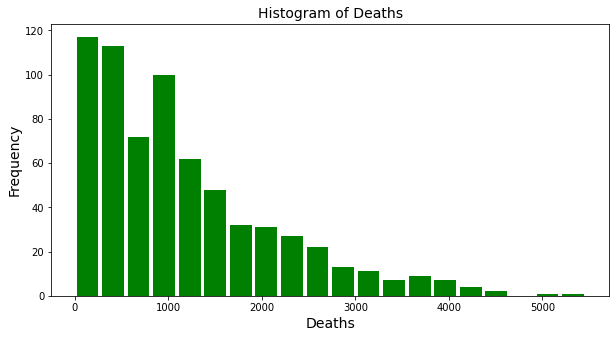

In [54]:
# Changing bins in Histogram
plt.figure(figsize=(10, 5))
plt.hist(x = df_main_covid['cases'], bins=20, color='green', rwidth=0.85)
plt.title('Histogram of Cases',fontsize=14, color='black')
plt.xlabel('Cases', fontsize=14, color='black')
plt.ylabel('Frequency', fontsize=14, color='black')
plt.ticklabel_format(style='plain',axis='x') 



plt.figure(figsize=(10, 5))
plt.hist(x = df_main_covid['deaths'], bins=20, color='green', rwidth=0.85)
plt.title('Histogram of Deaths',fontsize=14, color='black')
plt.xlabel('Deaths', fontsize=14, color='black')
plt.ylabel('Frequency', fontsize=14, color='black')

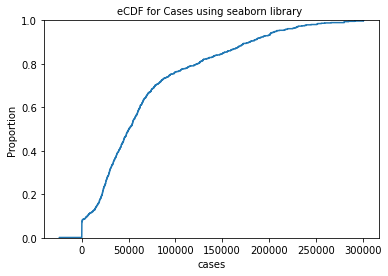

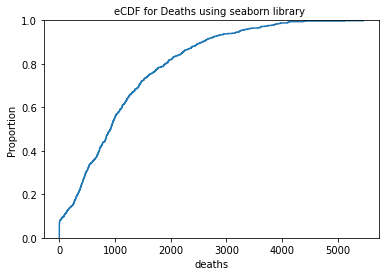

In [55]:
#Import seaborn library and generate ecdf plot
import seaborn as sns
sns.ecdfplot(x = df_main_covid['cases'])
plt.title('eCDF for Cases using seaborn library ',fontsize=10, color='black')
plt.ticklabel_format(style='plain',axis='x') 
plt.show()

sns.ecdfplot(x = df_main_covid['deaths'])
plt.title('eCDF for Deaths using seaborn library ',fontsize=10, color='black')
plt.show()

In [56]:
import datetime 
df_main_covid.index = pd.to_datetime(df_main_covid['date'],format='%m/%d/%Y')
df_month= df_main_covid.groupby([pd.Grouper(freq='M')]).sum()

In [57]:
df_final = df_month.reset_index()

In [58]:
df_final['cases(m)'] = df_final['cases']/1000000 
df_final['deaths(m)'] = df_final['deaths']/1000000 
df_2020 = df_final[0:12]

<Figure size 720x360 with 0 Axes>

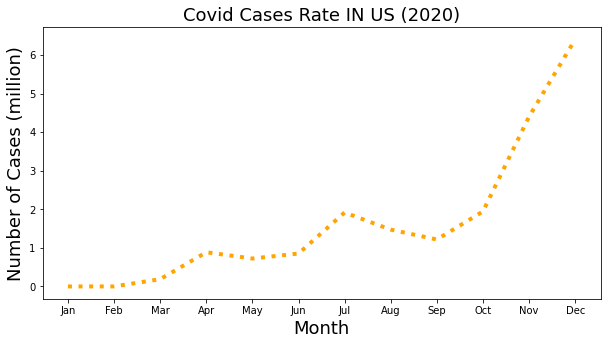

In [59]:
plt.figure(figsize=(10, 5))
date = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(10, 5))
plt.plot(date, df_2020['cases(m)'], linewidth=4,linestyle='dotted', color = 'orange')
plt.title('Covid Cases Rate IN US (2020)',fontsize=18, color='black')
plt.xlabel('Month', fontsize=18, color='black')
plt.ylabel('Number of Cases (million)', fontsize=18, color='black')
plt.ticklabel_format(style='plain',axis='y') 
plt.show()

<Figure size 720x360 with 0 Axes>

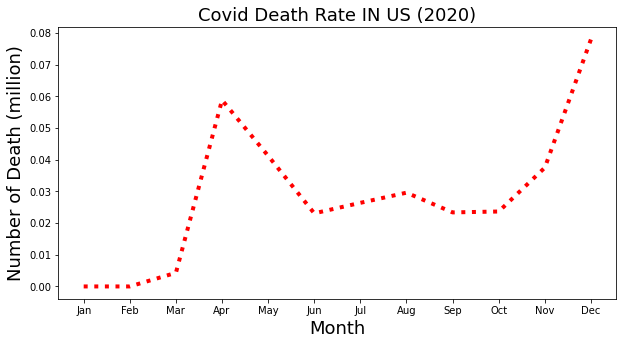

In [60]:
plt.figure(figsize=(10, 5))
date = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(10, 5))
plt.plot(date, df_2020['deaths(m)'], linewidth=4,linestyle='dotted', color = 'red')
plt.title('Covid Death Rate IN US (2020)',fontsize=18, color='black')
plt.xlabel('Month', fontsize=18, color='black')
plt.ylabel('Number of Death (million)', fontsize=18, color='black')
plt.ticklabel_format(style='plain',axis='y') 
plt.show()

In [61]:
x = df_2020['cases(m)']
y = (data_gas_2020['Consumption'][::-1])/1000
z = data_gas_2020['Price'][::-1]
date = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep', 'Oct', 'Nov', 'Dec']

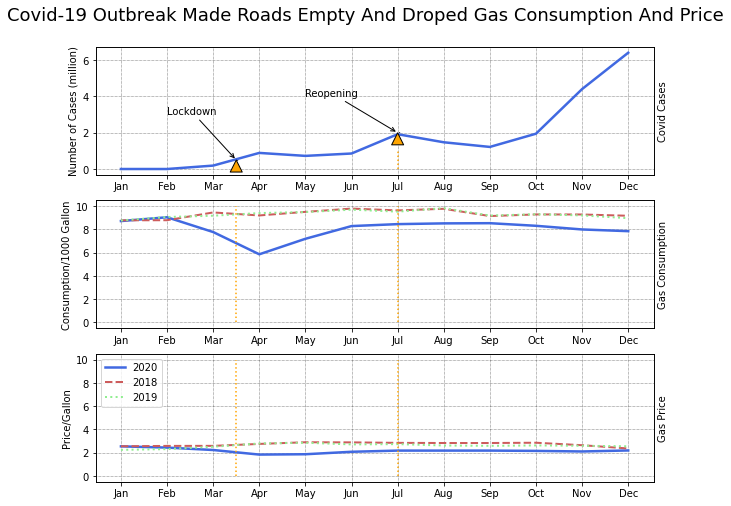

In [86]:
fig, ax = plt.subplots(3, sharex=False, figsize=(10,8))
ax[0].plot(date,x, color = 'royalblue',linewidth=2.5)
ax[1].plot(date,y, color = 'royalblue', label ='2020',linewidth=2.5)
ax[1].plot(date,(data_gas_2018['Consumption'][::-1])/1000,linewidth=2,linestyle='--', color = 'indianred',label ='2018')
ax[1].plot(date,(data_gas_2019['Consumption'][::-1])/1000,linewidth=2,linestyle='dotted', color = 'lightgreen', label ='2019')
ax[2].plot(date,z, color = 'royalblue', label ='2020',linewidth=2.5)
ax[2].plot(date,(data_gas_2018['Price'][::-1]),linewidth=2,linestyle='--', color = 'indianred',label ='2018')
ax[2].plot(date,(data_gas_2019['Price'][::-1]), linewidth=2,linestyle='dotted',color = 'lightgreen', label ='2019')
ax[0].set_ylabel('Number of Cases (million)')
ax[1].set_ylabel('Consumption/1000 Gallon')
ax[2].set_ylabel('Price/Gallon')
ax[0].grid(True, which='both', linestyle=':', linewidth='0.5', color='black')
ax[1].grid(True, which='both', linestyle=':', linewidth='0.5', color='black')
ax[2].grid(True, which='both', linestyle=':', linewidth='0.5', color='black')
ax[2].legend(loc="upper left")
ax[0].annotate("Lockdown", xy=(2.5,0.5), xytext=(1, 3), arrowprops=dict(arrowstyle="->"))
ax[0].annotate( '.', xy=(2.5,0.5), arrowprops = dict(facecolor ='orange',shrink = 0.05))
ax[0].annotate("Reopening", xy=(6,2), xytext=(4, 4), arrowprops=dict(arrowstyle="->"))
ax[0].annotate( '.', xy=(6,2), arrowprops = dict(facecolor ='orange',shrink = 0.05))
ax0 = ax[0].twinx()
ax0.set_ylabel('Covid Cases')
ax0.set_yticks([])
ax1 = ax[1].twinx()
ax1.set_ylabel('Gas Consumption')
ax1.set_yticks([])
ax2 = ax[2].twinx()
ax2.set_ylabel('Gas Price')
ax2.set_yticks([])
fig.suptitle('Covid-19 Outbreak Made Roads Empty And Droped Gas Consumption And Price',fontsize=18, y=0.95) 
ax[1].vlines([2.5, 6], 0, 10, linestyles='dotted', colors='orange')
ax[2].vlines([2.5, 6], 0, 10, linestyles='dotted', colors='orange')
ax[0].vlines([ 6], 0, 1, linestyles='dotted', colors='orange')
plt.show()

In response to the spread of COVID-19, the state mandated a stay at home order from March 18, 2020 until May 12, 2020, when the state began a four-phased reopening plan that lasted through July 1, 2020.

In [73]:
data_gas_2021 = pd.read_csv('C:\Maryam\ODU\Fall2021\DataVisualisation\HWs\HW8\Gas_2021.csv')
data_2021

,Month,Price,Consumption
0,21-Sep,3.272,8966
1,21-Aug,3.255,9111
2,21-Jul,3.231,9313
3,21-Jun,3.157,9273
4,21-May,3.076,9137
5,21-Apr,2.948,8791
6,21-Mar,2.898,8577
7,21-Feb,2.587,7744
8,21-Jan,2.420,7666


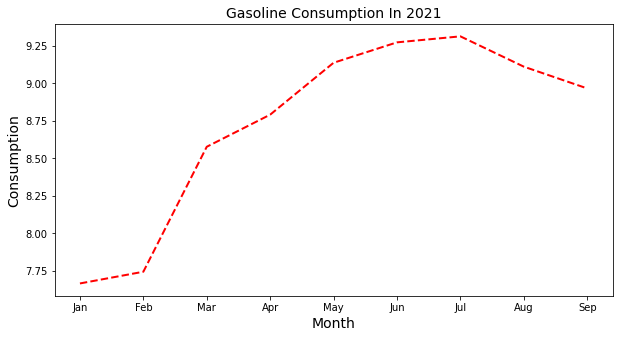

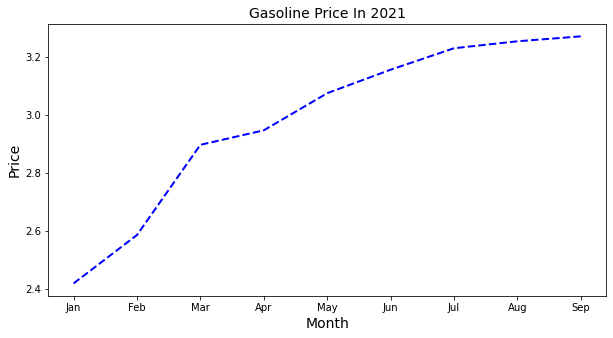

In [74]:
plt.figure(figsize=(10, 5))
month_2021 = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
plt.plot(month_2021, data_gas_2021['Consumption'][::-1]/1000, linewidth=2,linestyle='--', color = 'red')
plt.title('Gasoline Consumption In 2021',fontsize=14, color='black')
plt.xlabel('Month', fontsize=14, color='black')
plt.ylabel('Consumption', fontsize=14, color='black')
plt.show()

plt.figure(figsize=(10, 5))
month_2021 = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
plt.plot(month_2021, data_gas_2021['Price'][::-1], linewidth=2,linestyle='--', color = 'blue')
plt.title('Gasoline Price In 2021',fontsize=14, color='black')
plt.xlabel('Month', fontsize=14, color='black')
plt.ylabel('Price', fontsize=14, color='black')
plt.show()

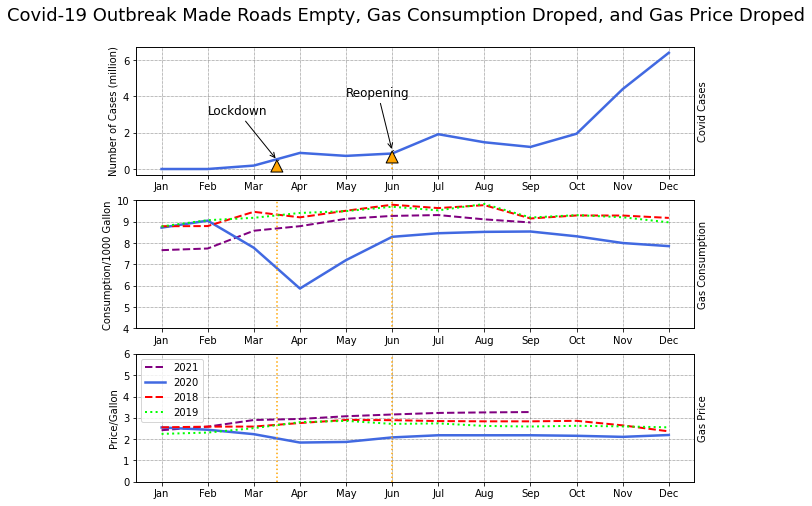

In [115]:
fig, ax = plt.subplots(3, sharex=False, figsize=(10,8))
ax[0].plot(date,x, color = 'royalblue',linewidth=2.5)
ax[1].plot(month_2021,(data_gas_2021['Consumption'][::-1])/1000, linewidth=2,linestyle='dashed',color = 'purple', label ='2021')
ax[1].plot(date,y, color = 'royalblue', label ='2020',linewidth=2.5)
ax[1].plot(date,(data_gas_2018['Consumption'][::-1])/1000,linewidth=2,linestyle='--', color = 'red',label ='2018')
ax[1].plot(date,(data_gas_2019['Consumption'][::-1])/1000,linewidth=2,linestyle='dotted', color = 'lime', label ='2019')
ax[2].plot(month_2021,(data_gas_2021['Price'][::-1]), linewidth=2,linestyle='dashed',color = 'purple', label ='2021')
ax[2].plot(date,z, color = 'royalblue', label ='2020',linewidth=2.5)
ax[2].plot(date,(data_gas_2018['Price'][::-1]),linewidth=2,linestyle='--', color = 'red',label ='2018')
ax[2].plot(date,(data_gas_2019['Price'][::-1]), linewidth=2,linestyle='dotted',color = 'lime', label ='2019')
ax[0].set_ylabel('Number of Cases (million)')
ax[1].set_ylabel('Consumption/1000 Gallon')
ax[2].set_ylabel('Price/Gallon')
ax[0].grid(True, which='both', linestyle=':', linewidth='0.5', color='black')
ax[1].grid(True, which='both', linestyle=':', linewidth='0.5', color='black')
ax[2].grid(True, which='both', linestyle=':', linewidth='0.5', color='black')
ax[2].legend(loc="upper left")
ax[0].annotate("Lockdown", xy=(2.5,0.5), xytext=(1, 3), size =12, arrowprops=dict(arrowstyle="->"))
ax[0].annotate( '.', xy=(2.5,0.5), arrowprops = dict(facecolor ='orange',shrink = 0.05))
ax[0].annotate("Reopening", xy=(5,1), xytext=(4, 4), size =12, arrowprops=dict(arrowstyle="->"))
ax[0].annotate( '.', xy=(5,1), arrowprops = dict(facecolor ='orange',shrink = 0.05))
ax0 = ax[0].twinx()
ax[1].set_ylim([4,10])
ax[2].set_ylim([0,6])
ax0.set_ylabel('Covid Cases')
ax0.set_yticks([])
ax1 = ax[1].twinx()
ax1.set_ylabel('Gas Consumption')
ax1.set_yticks([])
ax2 = ax[2].twinx()
ax2.set_ylabel('Gas Price')
ax2.set_yticks([])
fig.suptitle('Covid-19 Outbreak Made Roads Empty, Gas Consumption Droped, and Gas Price Droped',fontsize=18, y=0.95) 
ax[1].vlines([2.5, 5], 0, 10, linestyles='dotted', colors='orange')
ax[2].vlines([2.5, 5], 0, 10, linestyles='dotted', colors='orange')
ax[0].vlines([ 5], 0, 1, linestyles='dotted', colors='orange')
plt.show()